In [1]:
import numpy as np                                   # linear algebra
import pandas as pd                                  # data processing, CSV file I/O (e.g. pd.read_csv)

import statsmodels.formula.api as smf                # logistic regression
import sklearn.linear_model                          # linear modeling in scikit-learn
import sklearn.tree                                  # tree in scikit-learn
import sklearn.ensemble                              # ensemble   in scikit-learn
import sklearn.neighbors                             # neighbors in scikit-learn
from sklearn.model_selection import train_test_split # train-test split

from sklearn.metrics import roc_auc_score            # auc score
from sklearn.metrics import classification_report    # Classification Report
from sklearn.ensemble import StackingClassifier      # Stacking Classifier 

import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.preprocessing import MinMaxScaler       # MinMaxScaler (normalizing data)
from sklearn.preprocessing import StandardScaler     # Standard Scaler
import xgboost as xgb                                # xgboost, needed for feature importance



# setting pandas print options
pd.set_option('display.max_rows', 500)     
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 200)


#####################
### TRAIN DATASET ###
#####################

# importing the training dataset
path = r"C:/Users/bromi/OneDrive/Python_Projects/Codeathon - Hackathon (HULT)/hult-codathon-2023/"
train_set = "train.csv"
# reading in the .csv file with pandas
spotify_train = pd.read_csv(filepath_or_buffer = path + train_set)

####################
### TEST DATASET ###
####################

# importing the testing dataset
path = r"C:/Users/bromi/OneDrive/Python_Projects\Codeathon - Hackathon (HULT)/hult-codathon-2023/"
test_set = "test.csv"

# reading in the .csv file with pandas
spotify_test = pd.read_csv(filepath_or_buffer = path + test_set)

########################################################################################################

# Checking Correlations

In [2]:
corr_matrix = spotify_train.corr().sort_values(by='Hit_or_Flop', ascending=False).head(20)['Hit_or_Flop']

corr_matrix

Hit_or_Flop         1.000000
danceability        0.345293
loudness            0.291183
valence             0.252668
energy              0.185197
time_signature      0.102064
mode                0.079450
tempo               0.036811
key                 0.006432
id                 -0.002531
speechiness        -0.035140
chorus_hit         -0.044031
liveness           -0.051134
sections           -0.055508
duration_ms        -0.070166
acousticness       -0.251480
instrumentalness   -0.401315
Name: Hit_or_Flop, dtype: float64

# Analyzing Raw Data

In [3]:
track_counts_plus_2_and_3 = spotify_train['track'].value_counts().loc[lambda x: (x >= 2) & (x <= 3)]

track_counts_plus_2 = spotify_train['track'].value_counts().loc[lambda x: (x > 1) & (x <= 2)]

track_counts_plus_3 = spotify_train['track'].value_counts().loc[lambda x: (x > 2) & (x <= 3)]

track_counts_plus_1 = spotify_train['track'].value_counts().loc[lambda x: (x > 1)]
track_counts_1_and_less = spotify_train['track'].value_counts().loc[lambda x: (x <= 1)]

# track_counts_plus_2 = spotify_train_n['track'].value_counts()

print('----------- 2 & 3 --------------')

print(track_counts_plus_2_and_3.sum())

print('----------- 2 ------------')

print(track_counts_plus_2.sum())

print('----------- 3 ------------')

print(track_counts_plus_3.sum())

print('----------- x > 1 ------------')

print(track_counts_plus_1.sum())

print('----------- x <= 1 ------------')

print(track_counts_1_and_less.sum())

----------- 2 & 3 --------------
2431
----------- 2 ------------
1948
----------- 3 ------------
483
----------- x > 1 ------------
2829
----------- x <= 1 ------------
17724


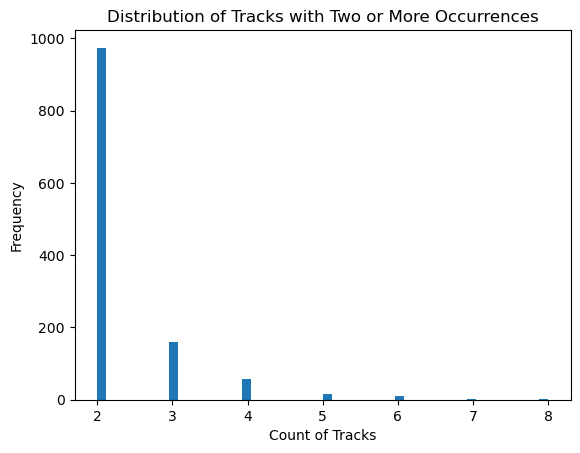

In [4]:
###########################################################################################
### TRACKS THAT ARE PRESENT MORE THAN ONCE, BELONG TO THE LARGEST GROUP OF PLAYED SONGS ###
###########################################################################################

### This might mean that these songs are listened to more than once 

# Get the value counts for the "track" column
track_counts = spotify_train['track'].value_counts()

# Filter to keep only the counts that are >= 2
track_counts_ge_2 = track_counts[track_counts >= 2] # Songs listened twice belong to the 2nd largest group
# track_counts_ge_2 = track_counts[track_counts >= 1] ### Songs listened once belong to the largest group


# Create a histogram of the filtered counts
plt.hist(track_counts_ge_2, bins=50) 

# Add labels and title
plt.xlabel('Count of Tracks')
plt.ylabel('Frequency')
plt.title('Distribution of Tracks with Two or More Occurrences')

# Show the plot
plt.show()

In [5]:
spotify_train.describe()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,Hit_or_Flop,id
count,20553.000000,20553.000000,20553.000000,20553.000000,20553.000000,20553.000000,20553.000000,20553.000000,20553.000000,20553.000000,20553.000000,2.055300e+04,20553.000000,20553.000000,20553.000000,20553.000000,20553.000000
mean,0.541097,0.578579,5.197392,-10.225330,0.692502,0.072902,0.366158,0.150932,0.201651,0.542891,118.888216,2.353757e+05,3.898117,40.070445,10.490926,0.500754,20639.212329
std,0.177122,0.253391,3.531583,5.300414,0.461469,0.086609,0.340645,0.300041,0.172370,0.267413,28.910167,1.210294e+05,0.415298,18.912796,4.923829,0.500012,11850.176911
min,0.000000,0.000276,0.000000,-44.347000,0.000000,0.000000,0.000000,0.000000,0.013600,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.422000,0.394000,2.000000,-12.807000,0.000000,0.033700,0.039500,0.000000,0.094200,0.330000,97.064000,1.735330e+05,4.000000,27.627610,8.000000,0.000000,10464.000000
50%,0.553000,0.601000,5.000000,-9.287000,1.000000,0.043400,0.259000,0.000111,0.132000,0.558000,117.067000,2.188000e+05,4.000000,35.774760,10.000000,1.000000,20585.000000
75%,0.670000,0.786000,8.000000,-6.375000,1.000000,0.069500,0.684000,0.055400,0.262000,0.769000,135.991000,2.672900e+05,4.000000,47.723140,12.000000,1.000000,30905.000000
max,0.988000,0.999000,11.000000,3.744000,1.000000,0.957000,0.996000,0.999000,0.993000,0.996000,241.009000,4.170227e+06,5.000000,235.060740,169.000000,1.000000,41104.000000


In [6]:
unique_hit_drop = spotify_train['Hit_or_Flop'] <= 0

unique_hit_drop.sum()

10261

# Normalizing Data

In [7]:

# # Making a copy of the dataset
# spotify_train_n = spotify_train.copy()


# # Selecting Columns to Normalize
# columns_to_normalize = ['danceability', 'energy', 'key', 'loudness',
#                         'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
#                         'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
#                         'sections', 'Hit_or_Flop']

# # Creating a MinMaxScaler object
# scaler = MinMaxScaler()

# # Fitting the scaler to the data and transform the data
# spotify_train_n[columns_to_normalize] = scaler.fit_transform(spotify_train_n[columns_to_normalize])

# Feature Eningeering

In [8]:
# preprocess data

def map_era(era_str):
    eras = ['60s', '70s', '80s','90s', '00s', '10s']
    for idx,era in enumerate(eras):
        if era_str == era:
            return idx

spotify_train['Era'] = spotify_train['Era'].apply(map_era)

#####################

# feature engineering
# skip this for now

spotify_train['Era_grouped'] = np.where(spotify_train['Era'] < 4, 0, 1)

###################
### Hit Artists ###
###################

spotify_train_8928 = spotify_train[spotify_train['Hit_or_Flop'] == 1]

vc_hit = spotify_train_8928['artist'].value_counts()
vc_hit = vc_hit[vc_hit > 1].index[:].tolist()

spotify_train['hits_artist'] = np.where(np.isin(spotify_train['artist'], vc_hit), 1, 0)

# print('hit artists')
# print(vc_hit)

#####################

####################
### Flop Artists ###
####################

spotify_train_83838 = spotify_train[spotify_train['Hit_or_Flop'] == 0] 

vc_flop = spotify_train_83838['artist'].value_counts()
vc_flop = vc_flop[vc_flop > 1].index[:].tolist()

spotify_train['flop_artist'] = np.where(np.isin(spotify_train['artist'], vc_flop), 0, 1)

# print('flop artists')
# print(vc_flop)

####################

#######################################
### Defining Top and not Top tracks ###
####################################### 

# Filtering the spotify_train dataset for only the hit songs
spotify_train_83993 = spotify_train[spotify_train['Hit_or_Flop'] == 1]

# Getting the 100 most common words in the titles of hit songs
from collections import Counter
common_hit_words = Counter(" ".join(spotify_train_83993["track"]).lower().split()).most_common(100)
common_hit_words = list(map(lambda w: w[0], common_hit_words))

# Filtering the spotify_train dataset for only the flop songs
spotify_train_83993 = spotify_train[spotify_train['Hit_or_Flop'] == 0]

# Getting the 100 most common words in the titles of flop songs
from collections import Counter
common_flop_words = Counter(" ".join(spotify_train_83993["track"]).lower().split()).most_common(100)
common_flop_words = list(map(lambda w: w[0], common_flop_words))

# Removing words that appear in both the hit and flop categories
common_hit_words_bkup = common_hit_words
common_hit_words = list(filter(lambda w: w.lower() not in common_flop_words, common_hit_words))
common_flop_words = list(filter(lambda w: w.lower() not in common_hit_words_bkup, common_flop_words))

# Printing the common hit and flop words
print('Hit strings')
print(common_hit_words)
print('Flop strings')
print(common_flop_words)

# Defining functions to check if a title contains hit or flop words
def has_hit_words(title):
    for word in common_hit_words:
        if f' {word} ' in title.lower():
            return 1
    return 0

def has_flop_words(title):
    for word in common_flop_words:
        if f' {word} ' in title.lower():
            return 0
    return 1

# Applying the has_hit_words function to the spotify_train dataset
spotify_train['has_hit_strings'] = spotify_train.apply(lambda r: has_hit_words(r['track']), axis=1)
spotify_train['has_hit_strings'][spotify_train['has_hit_strings'] == 1]

# Applying the has_flop_words function to the spotify_train dataset
spotify_train['has_flop_strings'] = spotify_train.apply(lambda r: has_flop_words(r['track']), axis=1)
spotify_train['has_flop_strings'][spotify_train['has_flop_strings'] == 0]


Hit strings
["can't", 'go', 'good', "it's", 'back', 'out', 'if', 'got', 'when', 'let', 'want', 'life', 'make', 'know', 'can', 'away', 'just', 'how', 'so', 'over', 'never', 'come', 'have', "you're", 'wanna', 'tonight', 'are', 'now', 'right', 'more', 'home', 'again', "i'll", 'gonna', 'say', 'not', 'there', 'only', 'too', 'here', 'woman', 'eyes', 'mind', 'she', 'thing', 'need', 'give', "ain't", 'last', 'was', 'u']
Flop strings
['-', 'de', 'la', 'live', 'remastered', 'blues', 'metal', '/', 'version', 'act', 'no.', 'el', '&', 'op.', 'mix', 'remaster', 'o', '2', 'en', 'punk', 'amor', 'que', 'remix', 'le', 'jazz', 'roll', '1', 'black', 'te', '(feat.', 'un', 'vivo', 'e', 'digital', 'theme', 'instrumental', 'mi', 'original', 'new', 'house', 'del', 'allegro', 'piano', 'death', 'version)', 'ao', '(from', 'music', 'i:', 'du', 'edit']


11       0
22       0
26       0
32       0
56       0
        ..
20471    0
20490    0
20491    0
20519    0
20535    0
Name: has_flop_strings, Length: 2806, dtype: int64

In [9]:
# Import necessary libraries
from sklearn.feature_selection import SelectKBest
from sklearn import feature_selection
import pandas as pd

# Create a copy of the original dataset
new_spotify_train = spotify_train.copy()

# Drop unnecessary columns
new_spotify_train.drop('track', axis=1, inplace=True)
new_spotify_train.drop('artist', axis=1, inplace=True)
new_spotify_train.drop('uri', axis=1, inplace=True)

# Extract features and target variable
X = new_spotify_train
Y = new_spotify_train['Hit_or_Flop']

# Use SelectKBest to select the best features
best_features = SelectKBest(score_func=feature_selection.f_regression, k=3)
fit = best_features.fit(X,Y)

# Create a dataframe of the scores of each feature
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

# Combine the feature scores and their respective names into a single dataframe
features_scores = pd.concat([df_columns, df_scores], axis=1)
features_scores.columns = ['Features', 'Score']

# Sort the features by their score
features_scores.sort_values(by='Score')


,Features,Score
15,Hit_or_Flop,-4.627674e+18
17,id,1.316789e-01
16,Era,2.820998e-01
2,key,8.503463e-01
18,Era_grouped,1.386159e+00
5,speechiness,2.540845e+01
10,tempo,2.788555e+01
13,chorus_hit,3.992007e+01
8,liveness,5.387606e+01
14,sections,6.351577e+01


# Model: Stacking Classifier 

Accuracy:  0.9534544275056763
Recall:  0.9647289353363815
Precision:  0.942866262368337
CL Report:                precision    recall  f1-score   support

           0       0.96      0.94      0.95      3104
           1       0.94      0.96      0.95      3062

    accuracy                           0.95      6166
   macro avg       0.95      0.95      0.95      6166
weighted avg       0.95      0.95      0.95      6166



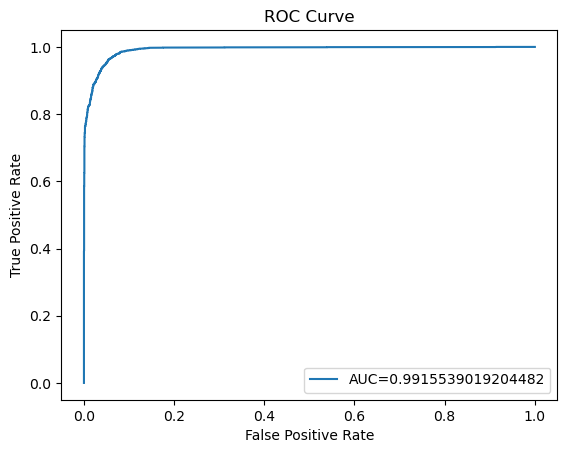

In [10]:
###########################
### Stacking Classifier ###
###########################

# Selecting the best features for the model
best_features = ['flop_artist', 'hits_artist', 
                 'danceability', 'has_flop_strings', 
                 'instrumentalness', 'loudness', 'acousticness', 
                 'valence', 'energy', 'time_signature', 
                 'has_hit_strings', 'mode', 'duration_ms']

# Separating the dataset into X (features) and Y (target variable)
X = spotify_train[best_features]
Y = spotify_train['Hit_or_Flop']

# Splitting the data into training and testing sets
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.3,random_state=100)

# Initializing all the models
dtc = sklearn.tree.DecisionTreeClassifier()
etc = sklearn.tree.ExtraTreeClassifier()
sgdc = sklearn.linear_model.SGDClassifier()
gbc = sklearn.ensemble.GradientBoostingClassifier()
rc = sklearn.linear_model.RidgeClassifier()
knn = sklearn.neighbors.KNeighborsClassifier()
abc = sklearn.ensemble.AdaBoostClassifier()
rfc = sklearn.ensemble.RandomForestClassifier()
hgbc = sklearn.ensemble.HistGradientBoostingClassifier()
lr = sklearn.linear_model.LogisticRegression()
bc = sklearn.ensemble.BaggingClassifier()

# Creating a list of tuples with the initialized models
estimators = [
        ('dtc', dtc), 
        ('etc', etc), 
        ('rc', rc),        # rc model
        ('lr', lr),        # lr model
#         ('sgdc', sgdc), 
        ('knn', knn),      # KNN model
        ('gbc', gbc),      # gbc model
#         ('abc', abc),      # abc model
        ('bc', bc),        # bc model
        ('rfc', rfc),      # rfc model
        ('hgbc', hgbc)     # hgbc model
]

# Stacking the models with Logistic Regression as the final estimator
model = StackingClassifier(estimators = estimators, final_estimator = lr)
model.fit(X_train,y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# metrics
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import StackingClassifier

# Printing the accuracy, recall, precision, and classification report
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred, zero_division=1))
print('Precision: ', metrics.precision_score(y_test, y_pred, zero_division=1))
print('CL Report: ', metrics.classification_report(y_test, y_pred, zero_division=1))

# ROC
y_pred_proba= model.predict_proba(X_test) [::,1]
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_proba)

# Computing the area under the ROC curve (AUC) and plotting the ROC curve
auc= metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

# Adding columns for the 'hits_artist' and 'flop_artist' features to the testing dataset
spotify_test['hits_artist'] = np.where(np.isin(spotify_test['artist'], vc_hit), 1, 0)


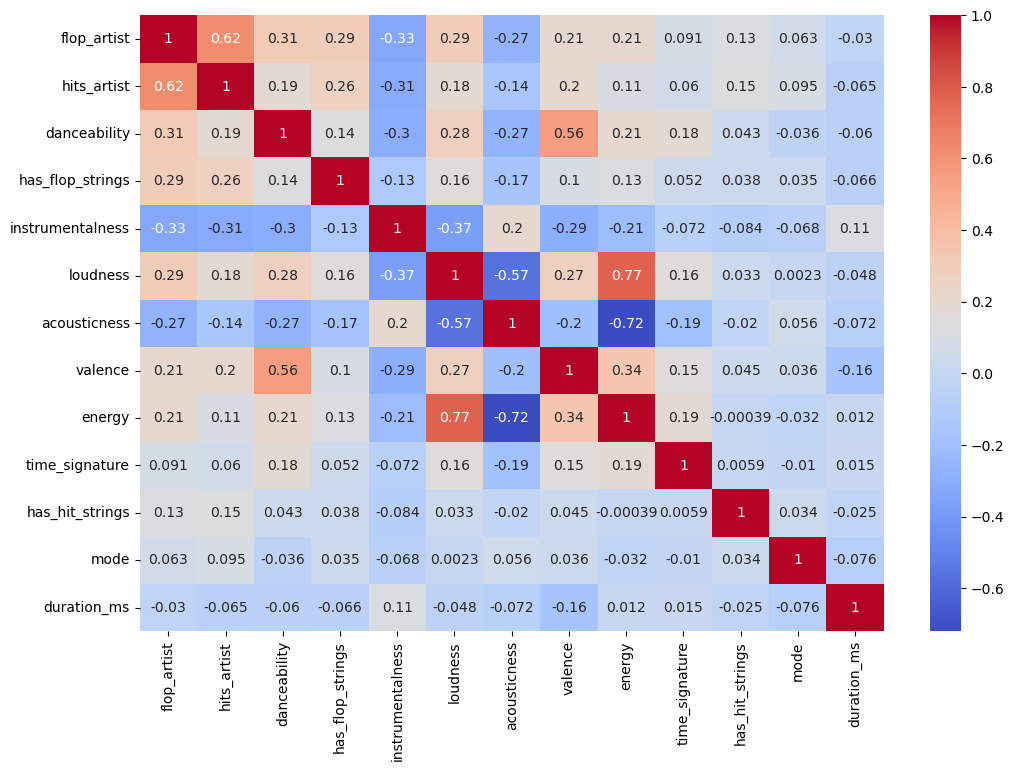

In [11]:
###################################
### Creating correlation matrix ###
###################################

corr_matrix = spotify_train[best_features].corr()

# Set up figure size
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show plot
plt.show()



# Feature Importance

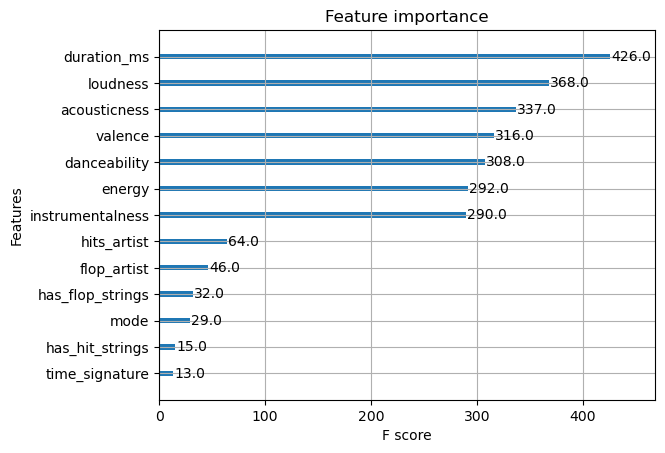

In [12]:

import xgboost as xgb

# fit the model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# plot feature importance
xgb.plot_importance(model)
plt.show()


# Cross-Validation

This cross-validation graph allows us to see the model was potentially on the border to be overfitted. We learned this after the hackathon and from the judges feedback. Even though this doesn't mean the training data was overfitted, it's a warning this should be checked out and not train the newly features engineered with the Hit_or_Flop variable, in order to be safe and avoid this from affecting business decisions. That said, the accuracy score is still very high, 0.91, and this means the model prediction was very much accurate. 

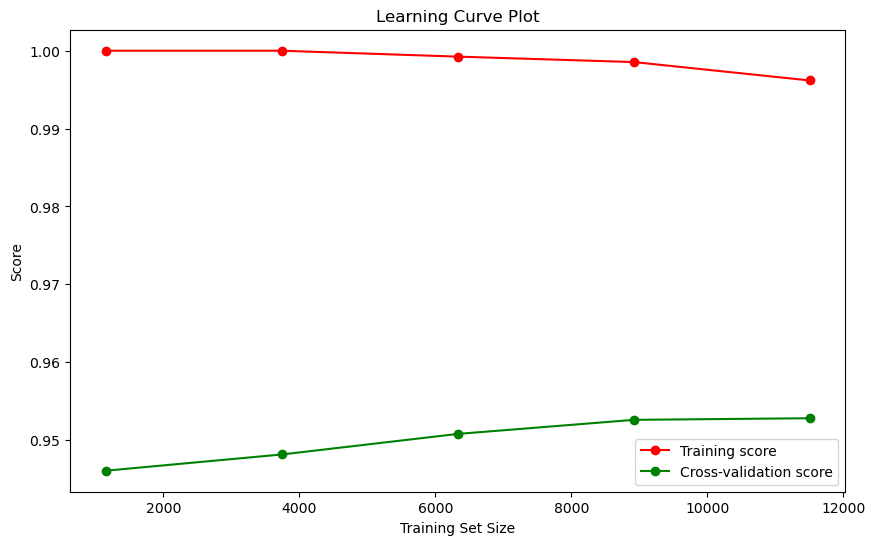

In [13]:
# import the library for learning_curve
from sklearn.model_selection import learning_curve

# compute learning curves for a StackingClassifier
train_sizes, train_scores, test_scores = learning_curve(model, 
                                                        X_train, 
                                                        y_train, 
                                                        cv=5)

# calculate the mean of the training scores across all cross validation folds for each training set size
train_scores_mean = np.mean(train_scores, axis=1)

# calculate the mean of the validation scores across all cross validation folds for each training set size
test_scores_mean = np.mean(test_scores, axis=1)

# create a plot of the learning curve
# set the figsize
plt.figure(figsize=(10, 6))

# plot the training score as a function of the training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')

# plot the cross validation score as a function of the training set size
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

# label the graph
plt.xlabel('Training Set Size')      # label the x-axis
plt.ylabel('Score')                  # label the y-axis
plt.title('Learning Curve Plot')     # add a title to the plot
plt.legend(loc='best')               # add a legend to the plot

plt.show()  # show the plot
